In [47]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Model / data parameters
num_classes = 10
input_shape = (28, 28)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
# x_train = np.expand_dims(x_train, -1)
# x_test = np.expand_dims(x_test, -1)
# print("x_train shape:", x_train.shape)
# print(x_train.shape[0], "train samples")
# print(x_test.shape[0], "test samples")


# # convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

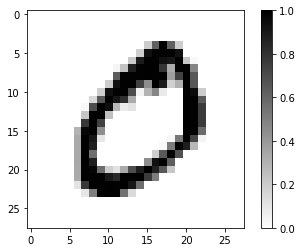

In [48]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(x_train[1], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)


In [40]:
y_train[0]

5

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


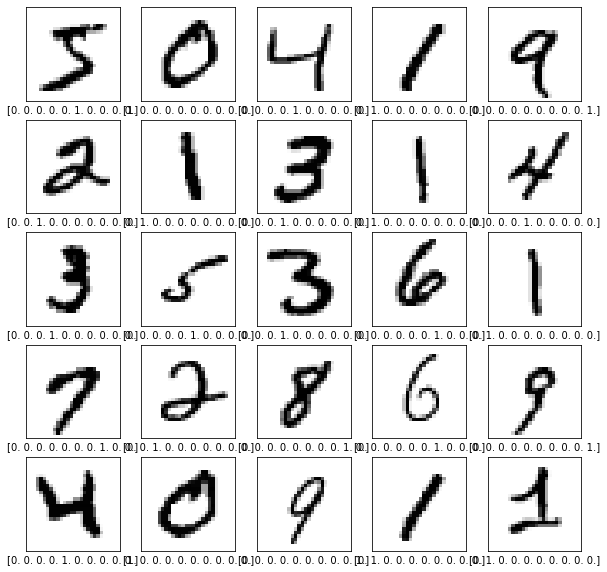

In [35]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

In [41]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [49]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(500,activation="relu"),
        layers.Dense(500,activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_16 (Dense)             (None, 500)               250500    
_________________________________________________________________
dropout_5 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                5010      
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


In [50]:
batch_size = 128
epochs = 15

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 6s 105us/sample - loss: 0.2451 - accuracy: 0.9271 - val_loss: 0.0954 - val_accuracy: 0.9717
Epoch 2/15
54000/54000 [==============================] - 5s 97us/sample - loss: 0.0892 - accuracy: 0.9726 - val_loss: 0.0854 - val_accuracy: 0.9743
Epoch 3/15
54000/54000 [==============================] - 5s 97us/sample - loss: 0.0580 - accuracy: 0.9809 - val_loss: 0.0659 - val_accuracy: 0.9815
Epoch 4/15
54000/54000 [==============================] - 5s 97us/sample - loss: 0.0384 - accuracy: 0.9885 - val_loss: 0.0583 - val_accuracy: 0.9830
Epoch 5/15
54000/54000 [==============================] - 5s 97us/sample - loss: 0.0312 - accuracy: 0.9900 - val_loss: 0.0736 - val_accuracy: 0.9807
Epoch 6/15
54000/54000 [==============================] - 5s 96us/sample - loss: 0.0239 - accuracy: 0.9919 - val_loss: 0.0703 - val_accuracy: 0.9812
Epoch 7/15
54000/54000 [==============================] 

In [51]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.09909096798712612
Test accuracy: 0.9795


In [52]:
model.evaluate(x_test[:1],y_test[:1])

1/1 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [58]:
model.predict(x_test[1:3])

array([[4.94280617e-18, 7.88215250e-13, 1.00000000e+00, 1.74806645e-14,
        1.21786341e-22, 2.24017312e-22, 3.01069146e-21, 7.78621388e-19,
        9.05027738e-18, 1.71910714e-23],
       [6.62297975e-14, 1.00000000e+00, 2.88988583e-10, 2.49709879e-17,
        1.82546367e-10, 2.11527464e-13, 4.03447886e-10, 1.34232755e-11,
        3.30314144e-11, 3.73939344e-16]], dtype=float32)

In [62]:
y_test[2]

1

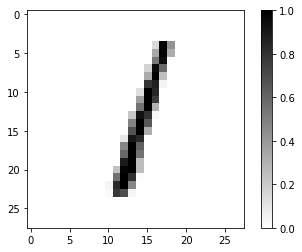

In [60]:
plt.figure()
plt.imshow(x_test[2], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)